In [1]:
"""
import pandas as pd

entity = 'backpack_dog'

data = [
    ("pretrained", f"evaluation_results/{entity}-baseline-eval.json"),
    ("real images", f"evaluation_results/{entity}-realimages-eval.json"),
    ("textual inversion", f"evaluation_results/{entity}-textual_inversion-eval.json"),
    ("dreambooth", f"evaluation_results/{entity}-dreambooth-eval.json"),
    ("custom diffusion", f"evaluation_results/{entity}-custom_diffusion-eval.json"),
    ("concept discovery", f"evaluation_results/{entity}-concept_discovery-eval.json"),
    ("disenbooth", f"evaluation_results/{entity}-disenbooth-eval.json"),
    ("disenbooth (my)", f"evaluation_results/{entity}-mydisenbooth-eval.json"),
]

rows = []
columns_titles = ["name", "CLIP-T", "DINO", "CLIP-I",  "DINO (base)", "CLIP-I (base)"]

for el in data:
    curr = pd.read_json(el[1], lines=True).mean()
    # print(curr, list(curr))
    values = []
    for k in columns_titles[1:]:
        values.append(curr.get(k, 0))
    rows.append([el[0]] + values)

df = pd.DataFrame(rows, columns=columns_titles)


# Function to apply bold text for max values
def highlight_max(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    if s.name == 'name':
        return [''] * len(s)
    else:
        is_max = s == s[2:].max()
        return ['font-weight: bold' if v else '' for v in is_max]

styler = df.style.apply(highlight_max).format({
    'CLIP-T': '{:.3f}', 
    'CLIP-I': '{:.3f}',
    'DINO':   '{:.3f}', 
    'CLIP-I (base)': '{:.3f}',
    'DINO (base)' :   '{:.3f}',
})
print(entity)
styler
"""

'\nimport pandas as pd\n\nentity = \'backpack_dog\'\n\ndata = [\n    ("pretrained", f"evaluation_results/{entity}-baseline-eval.json"),\n    ("real images", f"evaluation_results/{entity}-realimages-eval.json"),\n    ("textual inversion", f"evaluation_results/{entity}-textual_inversion-eval.json"),\n    ("dreambooth", f"evaluation_results/{entity}-dreambooth-eval.json"),\n    ("custom diffusion", f"evaluation_results/{entity}-custom_diffusion-eval.json"),\n    ("concept discovery", f"evaluation_results/{entity}-concept_discovery-eval.json"),\n    ("disenbooth", f"evaluation_results/{entity}-disenbooth-eval.json"),\n    ("disenbooth (my)", f"evaluation_results/{entity}-mydisenbooth-eval.json"),\n]\n\nrows = []\ncolumns_titles = ["name", "CLIP-T", "DINO", "CLIP-I",  "DINO (base)", "CLIP-I (base)"]\n\nfor el in data:\n    curr = pd.read_json(el[1], lines=True).mean()\n    # print(curr, list(curr))\n    values = []\n    for k in columns_titles[1:]:\n        values.append(curr.get(k, 0))\n  

In [33]:
import pandas as pd
import json

# name
entities = ('can', 'dog', 'backpack_dog')

metrics = ["DINO", "CLIP-I", "CLIP-T", "DIV"]

columns = ['name'] + metrics

table = []

# Function to apply bold text for max values
def highlight_max(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    if s.name == 'name':
        return [''] * len(s)
    else:
        is_max = s == s[2:].max()
        return ['font-weight: bold' if v else '' for v in is_max]


for entity in entities:
    for metric in metrics:
        columns.append(metric + f' [{entity}]')
    data = [
        ("pretrained", f"evaluation_results/{entity}-baseline-eval.json"),
    #    ("real images", f"evaluation_results/{entity}-realimages-eval.json"),
        ("textual inversion", f"evaluation_results/{entity}-textual_inversion-eval.json"),
        ("custom diffusion", f"evaluation_results/{entity}-custom_diffusion-eval.json"),
        ("concept discovery", f"evaluation_results/{entity}-concept_discovery-eval.json"),
        ("dreambooth", f"evaluation_results/{entity}-dreambooth-eval.json"),
        ("disenbooth", f"evaluation_results/{entity}-disenbooth-eval.json"),
        ("disenbooth (my)", f"evaluation_results/{entity}-mydisenbooth-eval.json"),
    ]
    if len(table) == 0:
        table = [[el[0]] + [0] * len(metrics) for el in data] 
    for i, (name, path) in enumerate(data):
        j = json.load(open(path))
        for metric in metrics:
            table[i].append(j[metric])
        #curr = pd.read_json(path, lines=True, dtype={'per_prompt': 'str'}).mean()
        # for metric in metrics:
        #    table[i].append(curr.get(metric, 0))

df = pd.DataFrame(table, columns=columns)


for metric in metrics:
    for entity in entities:
        df[metric] += df[metric + f' [{entity}]']
    df[metric] /= len(entities)

format_array = {}
for c in columns[1:]:
    format_array[c] = '{:.3f}'

styler = df.style.apply(highlight_max).format(format_array)
print(entity)
styler

backpack_dog


In [3]:
df[['DINO [can]', 'DINO [dog]', 'DINO [backpack_dog]']].std(axis=1)

0    0.061090
1    0.156362
2    0.086421
3    0.105192
4    0.156824
5    0.103906
6    0.104904
dtype: float64

In [4]:
df[['CLIP-T [can]', 'CLIP-T [dog]', 'CLIP-T [backpack_dog]']].std(axis=1)

0    0.005821
1    0.010082
2    0.012481
3    0.007044
4    0.022193
5    0.012729
6    0.013087
dtype: float64

In [5]:
df[['DIV [can]', 'DIV [dog]', 'DIV [backpack_dog]']].std(axis=1)

0    0.006811
1    0.013040
2    0.047749
3    0.003681
4    0.029947
5    0.043358
6    0.042651
dtype: float64

In [6]:
df.to_json()

'{"name":{"0":"pretrained","1":"textual inversion","2":"dreambooth","3":"custom diffusion","4":"concept discovery","5":"disenbooth","6":"disenbooth (my)"},"DINO":{"0":0.291124611,"1":0.5763186777,"2":0.6449364747,"3":0.7064479867,"4":0.6407290338,"5":0.651948918,"6":0.6592247551},"CLIP-I":{"0":0.6217961695,"1":0.7173294539,"2":0.7482398543,"3":0.7726974281,"4":0.7620076494,"5":0.7389143877,"6":0.7439409177},"CLIP-T":{"0":0.3442036945,"1":0.3028336587,"2":0.3261238605,"3":0.3084444172,"4":0.2739103189,"5":0.3266825357,"6":0.3243241372},"DIV":{"0":0.6904784146,"1":0.6772979771,"2":0.5745487342,"3":0.6194852785,"4":0.6438333987,"5":0.5980393818,"6":0.6023850117},"DINO [can]":{"0":0.3609406346,"1":0.5606777213,"2":0.685958028,"3":0.706054607,"4":0.634394721,"5":0.699047841,"6":0.7070648104},"CLIP-I [can]":{"0":0.5511287433,"1":0.6612520342,"2":0.7339803057,"3":0.7467358395,"4":0.6851538083,"5":0.7181542966,"6":0.7097827146},"CLIP-T [can]":{"0":0.3508618163,"1":0.3052587889,"2":0.311824951,

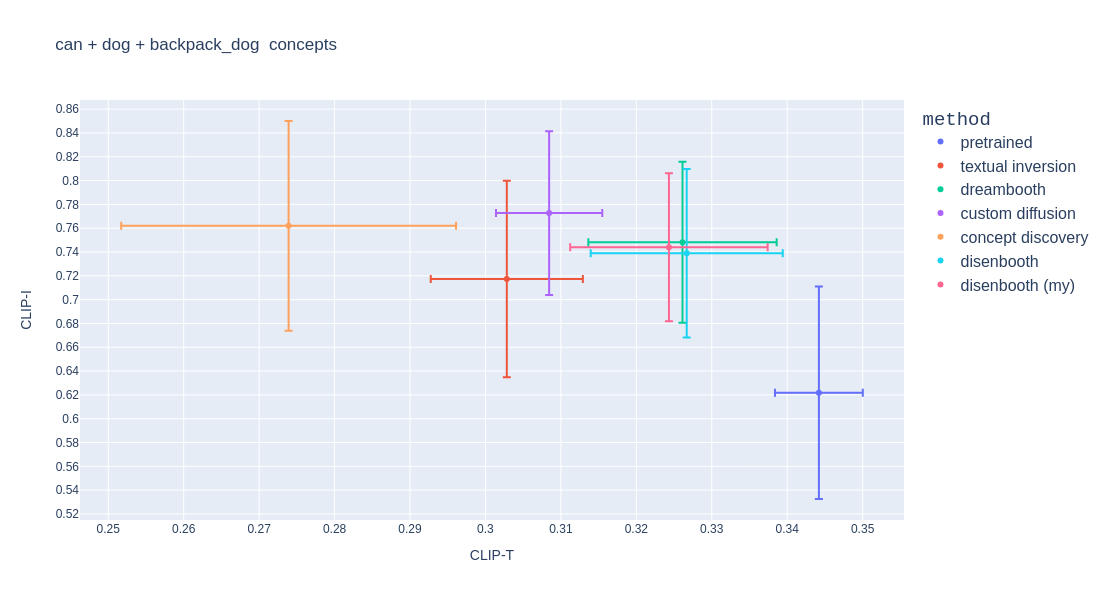

<Figure size 320x320 with 0 Axes>

In [7]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

#pio.renderers.default='notebook'
entity = "can + dog + backpack_dog "
dfc = df[df['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='CLIP-I', x='CLIP-T', title=f'{entity} concepts',
                 labels={
                     "CLIP-I": "CLIP-I",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
                 error_y=dfc[['CLIP-I [can]', 'CLIP-I [dog]', 'CLIP-I [backpack_dog]']].std(axis=1), 
                 error_x=dfc[['CLIP-T [can]', 'CLIP-T [dog]', 'CLIP-T [backpack_dog]']].std(axis=1),
                    width=600, height=600
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

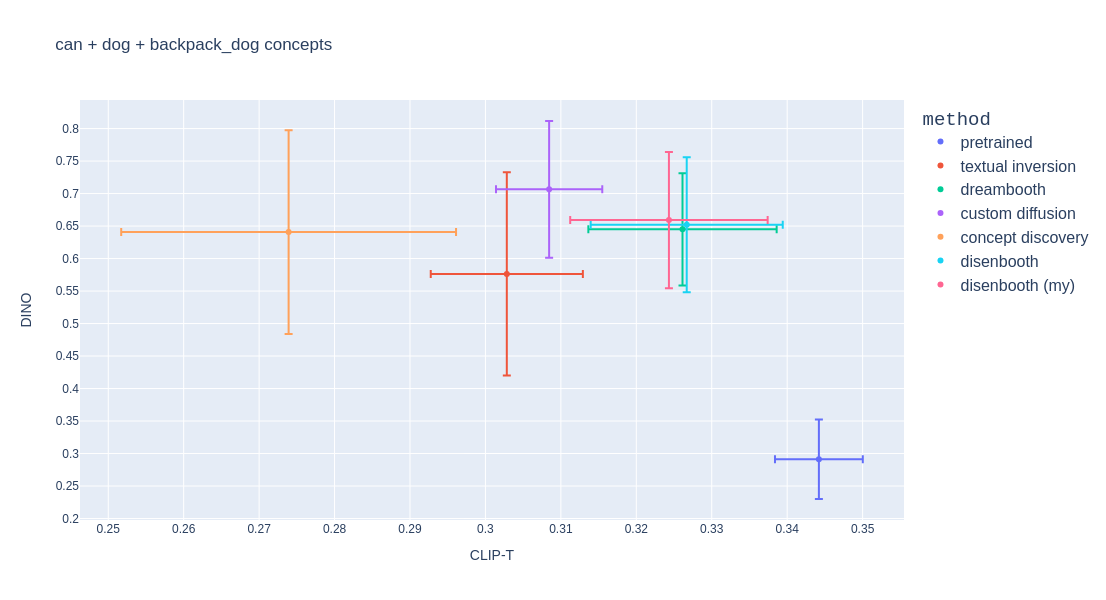

<Figure size 320x320 with 0 Axes>

In [8]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

#pio.renderers.default='notebook'
entity = "can + dog + backpack_dog"
dfc = df[df['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='DINO', x='CLIP-T', title=f'{entity} concepts', width=600, height=600,
                 error_y=dfc[['DINO [can]', 'DINO [dog]', 'DINO [backpack_dog]']].std(axis=1), 
                 error_x=dfc[['CLIP-T [can]', 'CLIP-T [dog]', 'CLIP-T [backpack_dog]']].std(axis=1),
                labels={
                     "DINO": "DINO",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

In [9]:
df

name      DINO    CLIP-I    CLIP-T       DIV  DINO [can]  \
0         pretrained  0.291125  0.621796  0.344204  0.690478    0.360941   
1  textual inversion  0.576319  0.717329  0.302834  0.677298    0.560678   
2         dreambooth  0.644936  0.748240  0.326124  0.574549    0.685958   
3   custom diffusion  0.706448  0.772697  0.308444  0.619485    0.706055   
4  concept discovery  0.640729  0.762008  0.273910  0.643833    0.634395   
5         disenbooth  0.651949  0.738914  0.326683  0.598039    0.699048   
6    disenbooth (my)  0.659225  0.743941  0.324324  0.602385    0.707065   

   CLIP-I [can]  CLIP-T [can]  DIV [can]  DINO [dog]  CLIP-I [dog]  \
0      0.551129      0.350862   0.697212    0.264951      0.722102   
1      0.661252      0.305259   0.676526    0.739913      0.812110   
2      0.733980      0.311825   0.531843    0.703207      0.821870   
3      0.746736      0.301901   0.615590    0.811836      0.850662   
4      0.685154      0.297692   0.649474    0.800624      0.858063   
5      0.718154      0.313136   0.561639    0.723965      0.817729   
6      0.709783      0.310819   0.580242    0.731681      0.815674   

   CLIP-T [dog]  DIV [dog]  DINO [backpack_dog]  CLIP-I [backpack_dog]  \
0      0.340081   0.683593             0.247482               0.592158   
1      0.311482   0.690707             0.428365               0.678626   
2      0.331711   0.626103             0.545645               0.688869   
3      0.307533   0.619962             0.601453               0.720694   
4      0.253751   0.670558             0.487169               0.742806   
5      0.328516   0.646008             0.532834               0.680859   
6      0.325205   0.651553             0.538929               0.706366   

   CLIP-T [backpack_dog]  DIV [backpack_dog]  
0               0.341669            0.690631  
1               0.291760            0.664662  
2               0.334835            0.565700  
3               0.315900            0.622904  
4               0.270288            0.611467  
5               0.338396            0.586471  
6               0.336948            0.575359

In [10]:
for metric in metrics:
    column_list = []
    for entity in entities:
        column_list.append(f'{metric} [{entity}]')
    df['error ' + metric] = df[column_list].std(axis=1)

In [11]:
minitable = []
for subject in list(entities) + ['all3']:
    df['subject'] = df['name'].apply(lambda x: subject)
    curr_columns = ['name', 'subject']
    for metric in metrics:
        if subject != 'all3':
            curr_columns.append(metric + f' [{subject}]')
        else:
            curr_columns.append(metric)
    for metric in metrics:
        curr_columns.append('error ' + metric)
            
    minitable.extend(df[curr_columns].values.tolist())
df2 = pd.DataFrame(minitable, columns=['name'] + ['subject'] + metrics + ['error ' + metric for metric in metrics])
df2

name       subject      DINO    CLIP-I    CLIP-T       DIV  \
0          pretrained           can  0.360941  0.551129  0.350862  0.697212   
1   textual inversion           can  0.560678  0.661252  0.305259  0.676526   
2          dreambooth           can  0.685958  0.733980  0.311825  0.531843   
3    custom diffusion           can  0.706055  0.746736  0.301901  0.615590   
4   concept discovery           can  0.634395  0.685154  0.297692  0.649474   
5          disenbooth           can  0.699048  0.718154  0.313136  0.561639   
6     disenbooth (my)           can  0.707065  0.709783  0.310819  0.580242   
7          pretrained           dog  0.264951  0.722102  0.340081  0.683593   
8   textual inversion           dog  0.739913  0.812110  0.311482  0.690707   
9          dreambooth           dog  0.703207  0.821870  0.331711  0.626103   
10   custom diffusion           dog  0.811836  0.850662  0.307533  0.619962   
11  concept discovery           dog  0.800624  0.858063  0.253751  0.670558   
12         disenbooth           dog  0.723965  0.817729  0.328516  0.646008   
13    disenbooth (my)           dog  0.731681  0.815674  0.325205  0.651553   
14         pretrained  backpack_dog  0.247482  0.592158  0.341669  0.690631   
15  textual inversion  backpack_dog  0.428365  0.678626  0.291760  0.664662   
16         dreambooth  backpack_dog  0.545645  0.688869  0.334835  0.565700   
17   custom diffusion  backpack_dog  0.601453  0.720694  0.315900  0.622904   
18  concept discovery  backpack_dog  0.487169  0.742806  0.270288  0.611467   
19         disenbooth  backpack_dog  0.532834  0.680859  0.338396  0.586471   
20    disenbooth (my)  backpack_dog  0.538929  0.706366  0.336948  0.575359   
21         pretrained          all3  0.291125  0.621796  0.344204  0.690478   
22  textual inversion          all3  0.576319  0.717329  0.302834  0.677298   
23         dreambooth          all3  0.644936  0.748240  0.326124  0.574549   
24   custom diffusion          all3  0.706448  0.772697  0.308444  0.619485   
25  concept discovery          all3  0.640729  0.762008  0.273910  0.643833   
26         disenbooth          all3  0.651949  0.738914  0.326683  0.598039   
27    disenbooth (my)          all3  0.659225  0.743941  0.324324  0.602385   

    error DINO  error CLIP-I  error CLIP-T  error DIV  
0     0.061090      0.089257      0.005821   0.006811  
1     0.156362      0.082541      0.010082   0.013040  
2     0.086421      0.067637      0.012481   0.047749  
3     0.105192      0.068763      0.007044   0.003681  
4     0.156824      0.088040      0.022193   0.029947  
5     0.103906      0.070757      0.012729   0.043358  
6     0.104904      0.062146      0.013087   0.042651  
7     0.061090      0.089257      0.005821   0.006811  
8     0.156362      0.082541      0.010082   0.013040  
9     0.086421      0.067637      0.012481   0.047749  
10    0.105192      0.068763      0.007044   0.003681  
11    0.156824      0.088040      0.022193   0.029947  
12    0.103906      0.070757      0.012729   0.043358  
13    0.104904      0.062146      0.013087   0.042651  
14    0.061090      0.089257      0.005821   0.006811  
15    0.156362      0.082541      0.010082   0.013040  
16    0.086421      0.067637      0.012481   0.047749  
17    0.105192      0.068763      0.007044   0.003681  
18    0.156824      0.088040      0.022193   0.029947  
19    0.103906      0.070757      0.012729   0.043358  
20    0.104904      0.062146      0.013087   0.042651  
21    0.061090      0.089257      0.005821   0.006811  
22    0.156362      0.082541      0.010082   0.013040  
23    0.086421      0.067637      0.012481   0.047749  
24    0.105192      0.068763      0.007044   0.003681  
25    0.156824      0.088040      0.022193   0.029947  
26    0.103906      0.070757      0.012729   0.043358  
27    0.104904      0.062146      0.013087   0.042651

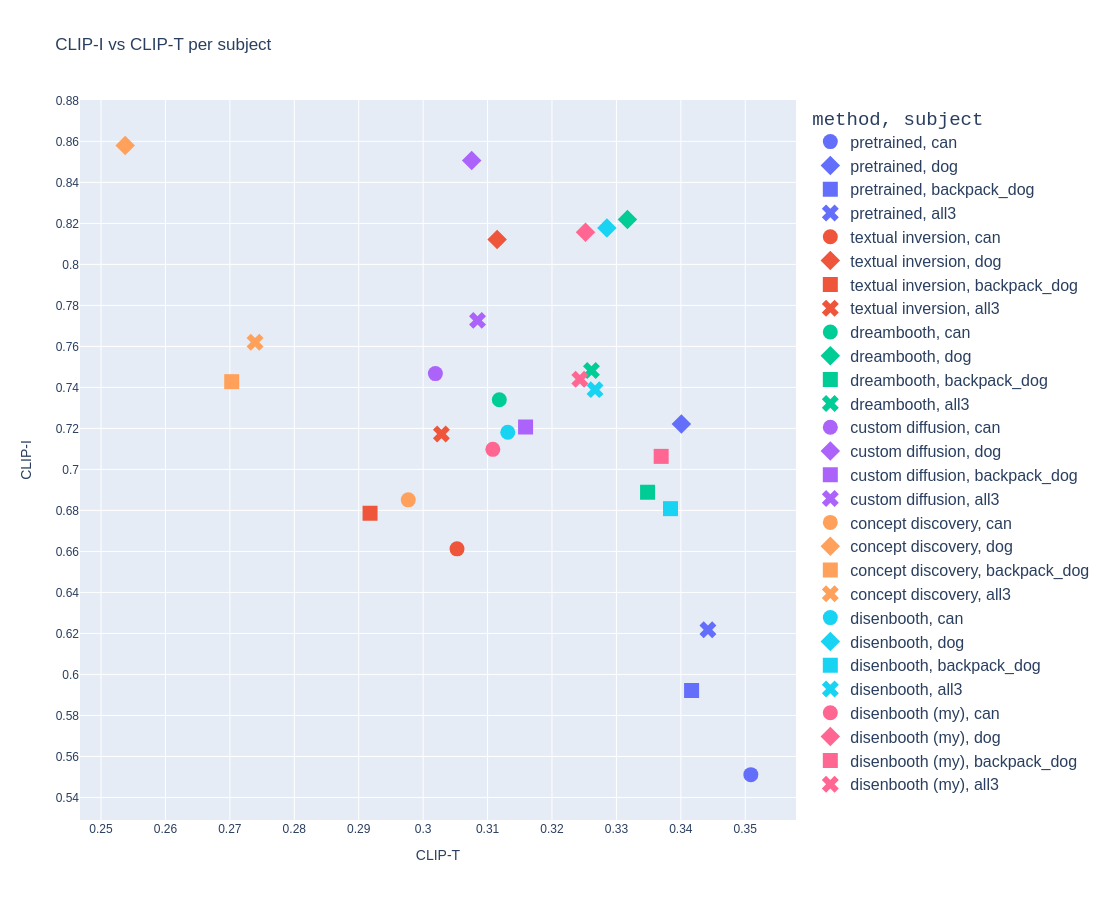

<Figure size 320x320 with 0 Axes>

In [12]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='CLIP-I', x='CLIP-T', symbol='subject', title="CLIP-I vs CLIP-T per subject ",
                 labels={
                     "CLIP-I": "CLIP-I",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error CLIP-I', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

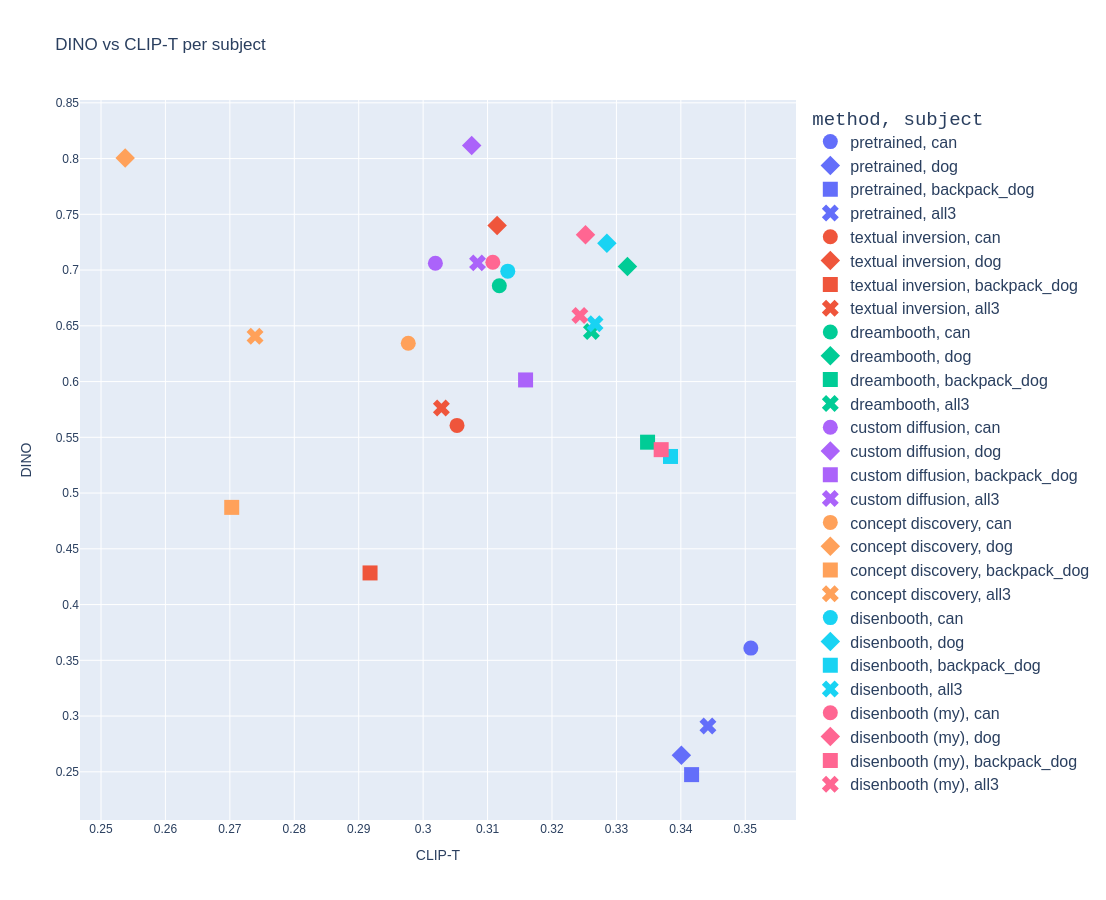

<Figure size 320x320 with 0 Axes>

In [13]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='DINO', x='CLIP-T', symbol='subject', title="DINO vs CLIP-T per subject ",
                 labels={
                     "DINO": "DINO",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error DINO', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

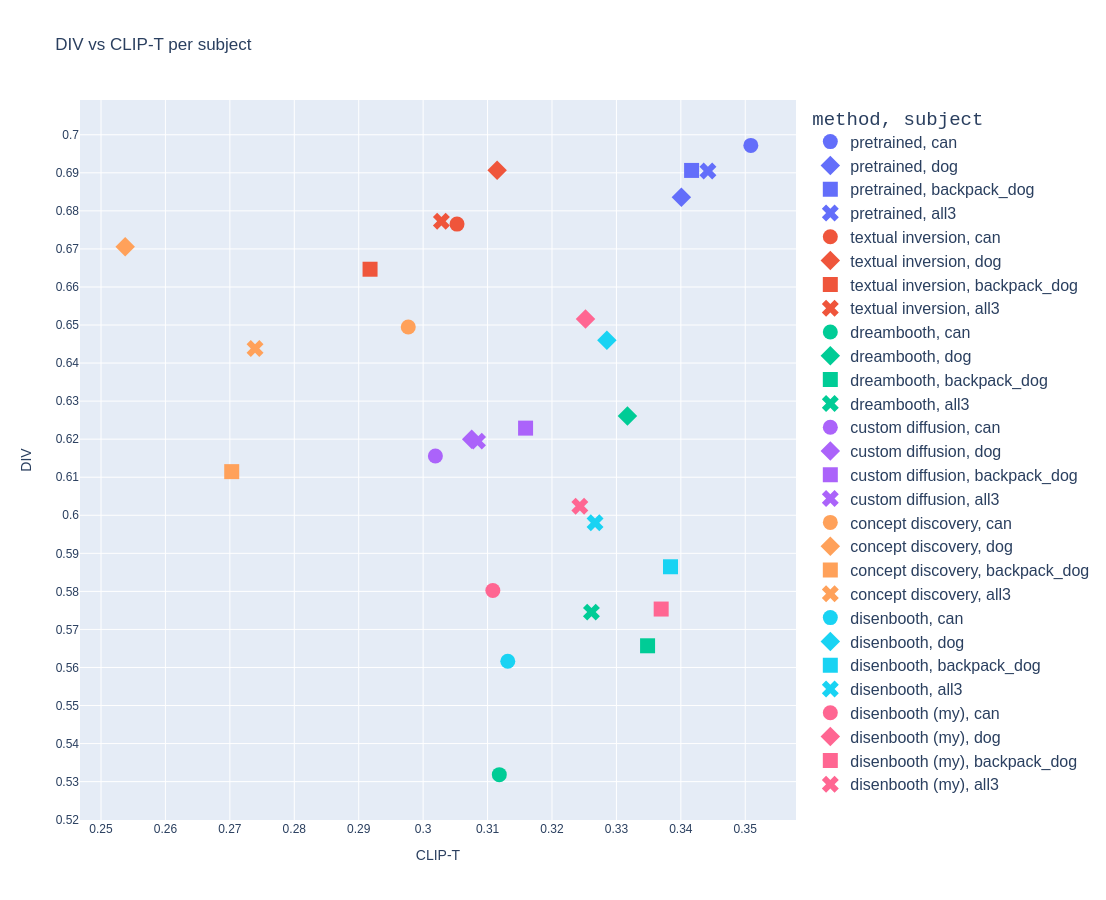

<Figure size 320x320 with 0 Axes>

In [14]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='DIV', x='CLIP-T', symbol='subject', title="DIV vs CLIP-T per subject ",
                 labels={
                     "DIV": "DIV",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error DIV', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

In [27]:
from collections import defaultdict

creature_attribute_prompt_idx = set(range(10, 25))
object_attribute_prompt_idx = set(range(20, 25))
do_measure_attributes = False
columns = ['name'] + metrics
table = []

for entity in entities:
    rel_set = object_attribute_prompt_idx
    if entity == 'dog':
        rel_set = creature_attribute_prompt_idx
    for metric in metrics:
        columns.append(metric + f' [{entity}]')
    data = [
        ("pretrained", f"evaluation_results/{entity}-baseline-eval.json"),
    #    ("real images", f"evaluation_results/{entity}-realimages-eval.json"),
        ("textual inversion", f"evaluation_results/{entity}-textual_inversion-eval.json"),
        ("dreambooth", f"evaluation_results/{entity}-dreambooth-eval.json"),
        ("custom diffusion", f"evaluation_results/{entity}-custom_diffusion-eval.json"),
        ("concept discovery", f"evaluation_results/{entity}-concept_discovery-eval.json"),
        ("disenbooth", f"evaluation_results/{entity}-disenbooth-eval.json"),
        ("disenbooth (my)", f"evaluation_results/{entity}-mydisenbooth-eval.json"),
    ]
    if len(table) == 0:
        table = [[el[0]] + [0] * len(metrics) for el in data] 
    for i, (name, path) in enumerate(data):
        j = json.load(open(path))['per_prompt']
        curr_metrics = defaultdict(float)
        cnt = 0
        for t, el in enumerate(j):
            if do_measure_attributes and t not in rel_set or not do_measure_attributes and t in rel_set:
                continue
            # print(entity, t, len(rel_set))
            cnt += 1
            for metric in metrics:
                curr_metrics[metric] += el[metric]
        for metric in metrics:
            table[i].append(curr_metrics[metric] / cnt)

df = pd.DataFrame(table, columns=columns)

for metric in metrics:
    for entity in entities:
        df[metric] += df[metric + f' [{entity}]']
    df[metric] /= len(entities)

format_array = {}
for c in columns[1:]:
    format_array[c] = '{:.3f}'

styler = df.style.apply(highlight_max).format(format_array)
print(entity)
styler


backpack_dog


In [28]:
for metric in metrics:
    column_list = []
    for entity in entities:
        column_list.append(f'{metric} [{entity}]')
    df['error ' + metric] = df[column_list].std(axis=1)

minitable = []
for subject in list(entities) + ['all3']:
    df['subject'] = df['name'].apply(lambda x: subject)
    curr_columns = ['name', 'subject']
    for metric in metrics:
        if subject != 'all3':
            curr_columns.append(metric + f' [{subject}]')
        else:
            curr_columns.append(metric)
    for metric in metrics:
        curr_columns.append('error ' + metric)
            
    minitable.extend(df[curr_columns].values.tolist())
df2 = pd.DataFrame(minitable, columns=['name'] + ['subject'] + metrics + ['error ' + metric for metric in metrics])
df2

name       subject      DINO    CLIP-I    CLIP-T       DIV  \
0          pretrained           can  0.371798  0.557963  0.353442  0.690221   
1   textual inversion           can  0.538373  0.650160  0.311403  0.683660   
2          dreambooth           can  0.668903  0.726093  0.322037  0.536110   
3    custom diffusion           can  0.701219  0.746503  0.314546  0.613284   
4   concept discovery           can  0.633913  0.689254  0.301373  0.655748   
5          disenbooth           can  0.697836  0.720796  0.321655  0.567663   
6     disenbooth (my)           can  0.702882  0.705780  0.318584  0.580243   
7          pretrained           dog  0.274622  0.731682  0.338983  0.638747   
8   textual inversion           dog  0.707785  0.817852  0.303580  0.686210   
9          dreambooth           dog  0.730155  0.846914  0.320441  0.595955   
10   custom diffusion           dog  0.830846  0.877380  0.294217  0.597503   
11  concept discovery           dog  0.800186  0.861157  0.254535  0.677130   
12         disenbooth           dog  0.762276  0.849363  0.317090  0.631841   
13    disenbooth (my)           dog  0.753686  0.842742  0.311627  0.631976   
14         pretrained  backpack_dog  0.239815  0.586176  0.342839  0.678082   
15  textual inversion  backpack_dog  0.422148  0.667826  0.295610  0.667427   
16         dreambooth  backpack_dog  0.527683  0.673636  0.343573  0.577398   
17   custom diffusion  backpack_dog  0.594078  0.711969  0.324661  0.625005   
18  concept discovery  backpack_dog  0.484904  0.738228  0.267708  0.610574   
19         disenbooth  backpack_dog  0.518975  0.663451  0.344769  0.582463   
20    disenbooth (my)  backpack_dog  0.526396  0.693459  0.343048  0.569475   
21         pretrained          all3  0.295412  0.625274  0.345088  0.669016   
22  textual inversion          all3  0.556102  0.711946  0.303531  0.679099   
23         dreambooth          all3  0.642247  0.748881  0.328683  0.569821   
24   custom diffusion          all3  0.708714  0.778617  0.311141  0.611930   
25  concept discovery          all3  0.639668  0.762880  0.274539  0.647817   
26         disenbooth          all3  0.659696  0.744536  0.327838  0.593989   
27    disenbooth (my)          all3  0.660988  0.747327  0.324420  0.593898   

    error DINO  error CLIP-I  error CLIP-T  error DIV  
0     0.068404      0.093226      0.007487   0.026908  
1     0.143641      0.092141      0.007897   0.010188  
2     0.103835      0.088858      0.012919   0.030634  
3     0.118562      0.087257      0.015505   0.013801  
4     0.157720      0.088563      0.024155   0.033979  
5     0.126055      0.095203      0.014839   0.033605  
6     0.119296      0.082861      0.016503   0.033413  
7     0.068404      0.093226      0.007487   0.026908  
8     0.143641      0.092141      0.007897   0.010188  
9     0.103835      0.088858      0.012919   0.030634  
10    0.118562      0.087257      0.015505   0.013801  
11    0.157720      0.088563      0.024155   0.033979  
12    0.126055      0.095203      0.014839   0.033605  
13    0.119296      0.082861      0.016503   0.033413  
14    0.068404      0.093226      0.007487   0.026908  
15    0.143641      0.092141      0.007897   0.010188  
16    0.103835      0.088858      0.012919   0.030634  
17    0.118562      0.087257      0.015505   0.013801  
18    0.157720      0.088563      0.024155   0.033979  
19    0.126055      0.095203      0.014839   0.033605  
20    0.119296      0.082861      0.016503   0.033413  
21    0.068404      0.093226      0.007487   0.026908  
22    0.143641      0.092141      0.007897   0.010188  
23    0.103835      0.088858      0.012919   0.030634  
24    0.118562      0.087257      0.015505   0.013801  
25    0.157720      0.088563      0.024155   0.033979  
26    0.126055      0.095203      0.014839   0.033605  
27    0.119296      0.082861      0.016503   0.033413

In [29]:
title_suffix = " (background only)"
if do_measure_attributes:
    title_suffix = " (attribute only)"

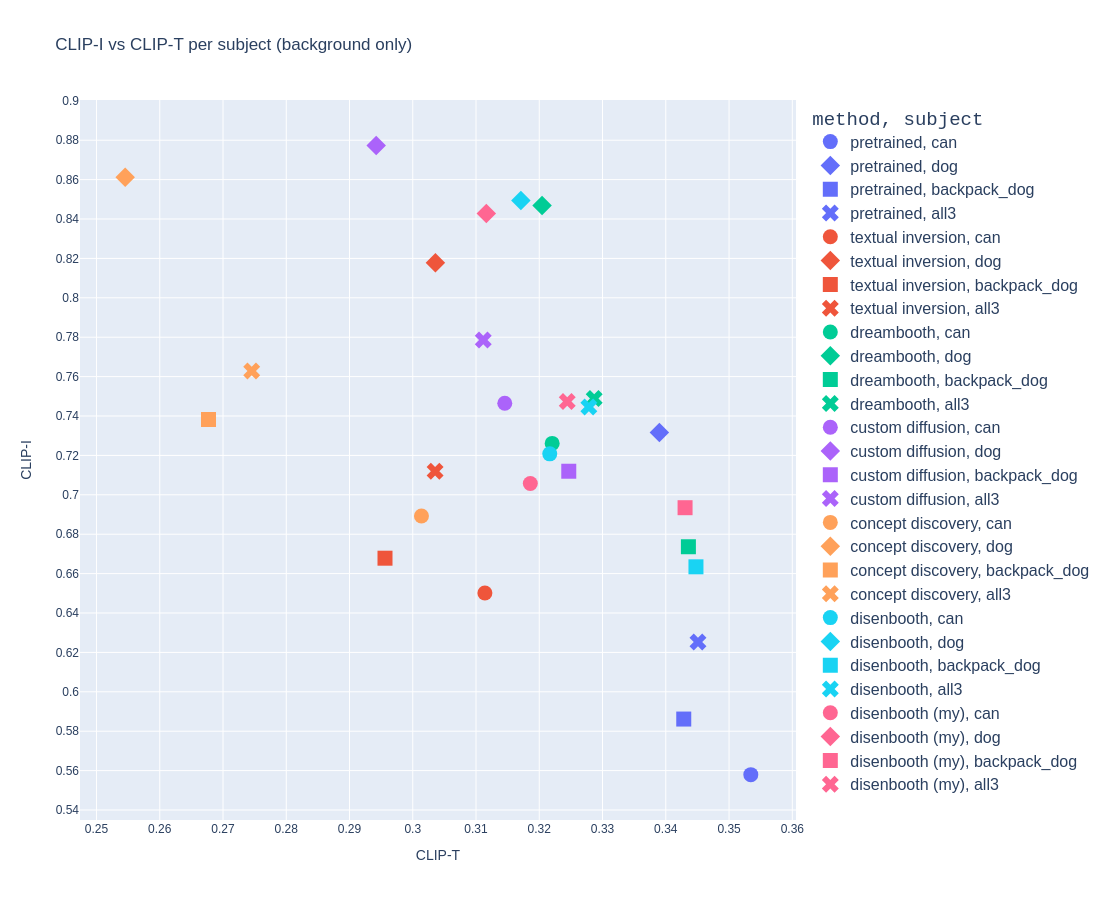

<Figure size 320x320 with 0 Axes>

In [30]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='CLIP-I', x='CLIP-T', symbol='subject', title="CLIP-I vs CLIP-T per subject" + title_suffix,
                 labels={
                     "CLIP-I": "CLIP-I",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error CLIP-I', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

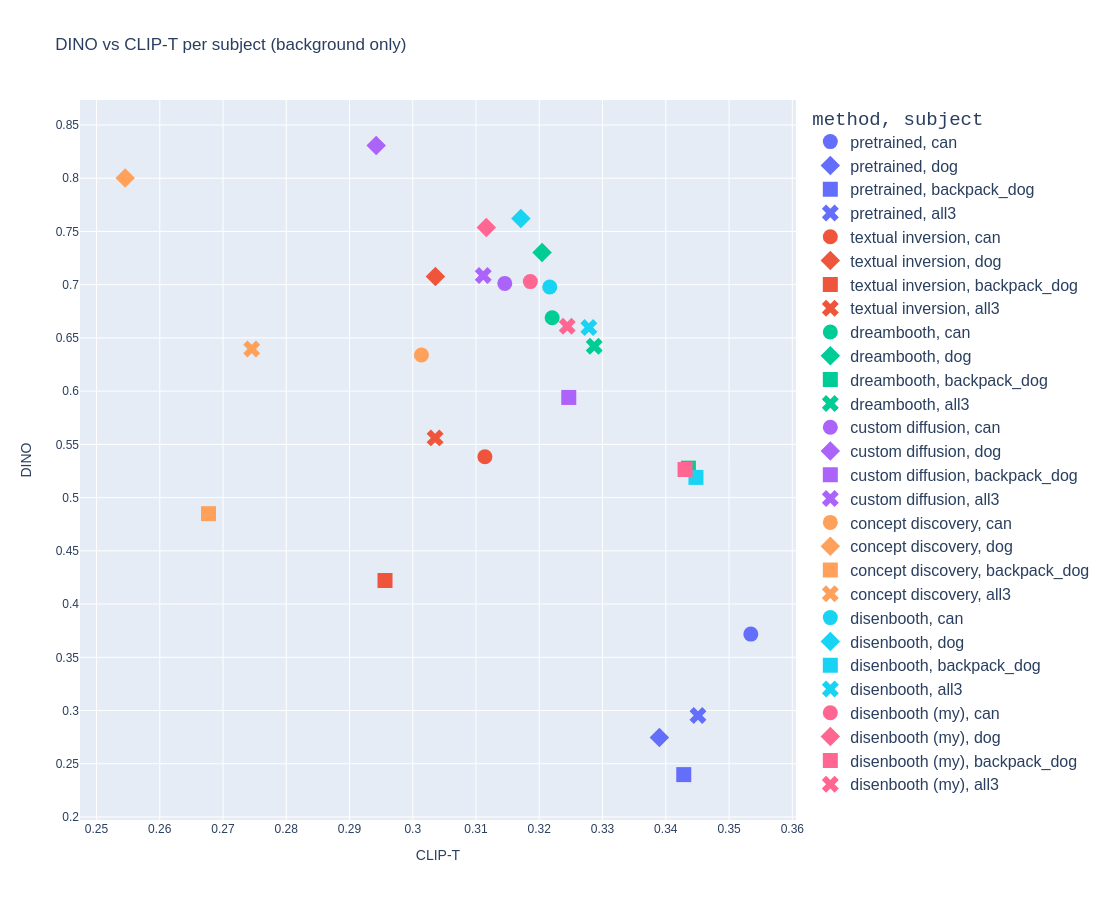

<Figure size 320x320 with 0 Axes>

In [31]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='DINO', x='CLIP-T', symbol='subject', title="DINO vs CLIP-T per subject" + title_suffix,
                 labels={
                     "DINO": "DINO",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error DINO', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()

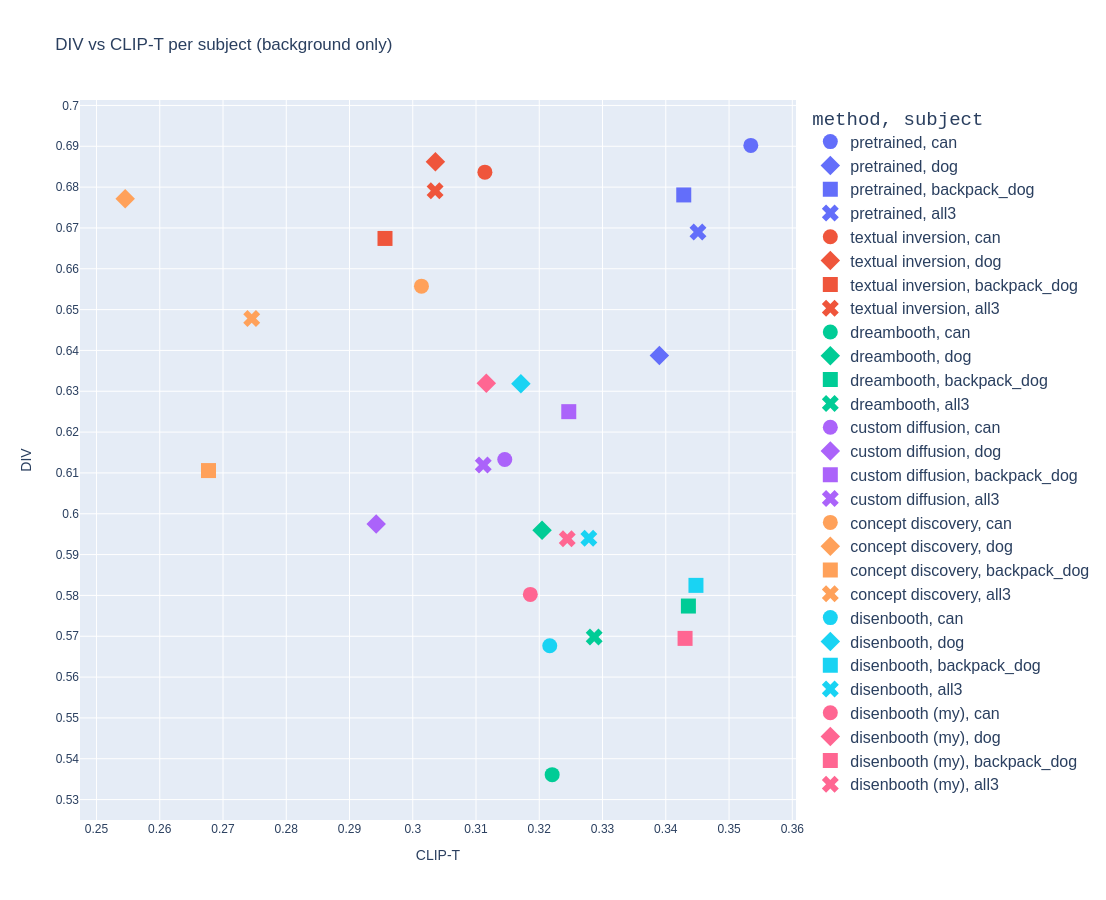

<Figure size 320x320 with 0 Axes>

In [32]:
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)

dfc = df2[df2['name'] != 'real images']
fig = px.scatter(dfc, color='name', y='DIV', x='CLIP-T', symbol='subject', title="DIV vs CLIP-T per subject" + title_suffix,
                 labels={
                     "DIV": "DIV",
                     "CLIP-T": "CLIP-T",
                     "name": "method"
                 }, 
#                 error_y='error DIV', 
#                 error_x='error CLIP-T',
                    width=900, height=900
)
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='Courier New',
    font=dict(
        size=16
    )
))
fig.update_traces(marker=dict(size=15))

fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=20)

fig.show()